# Exploratory Data Analysis (EDA) - Comparing Different Data Types

## *Choosing the right visualization*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#-- We will be using the Iris dataset today
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


In [ ]:
iris.head()

In [ ]:
#-- Creating a categorical value for petal_width
iris["petal_width_categorical"] = None
iris.loc[iris["petal_width"]< 2, "petal_width_categorical"] = "1 - 2 (CM)"
iris.loc[iris["petal_width"]< 1, "petal_width_categorical"] = "0 - 1 (CM)"
iris["petal_width_categorical"] = iris["petal_width_categorical"].fillna("2 + (CM)")

In [ ]:
iris.sample(5)

In [ ]:
iris.shape

## Review of Types of Data



*   `Continuous Data`: Numeric and unbounded data e.g Speed of a pitch
*   `Discrete Data`: Numeric data on an interval e.g. Number of children
*   `Ordinal Data`: Variables that have two or more categories, but which **do**  have an intrinsic order. Ordered categorical data e.g. Letter Grades
*   `Nominal Data`: Variables that have two or more categories, but which **do not** have an intrinsic order. Unordered categorical data e.g. car color



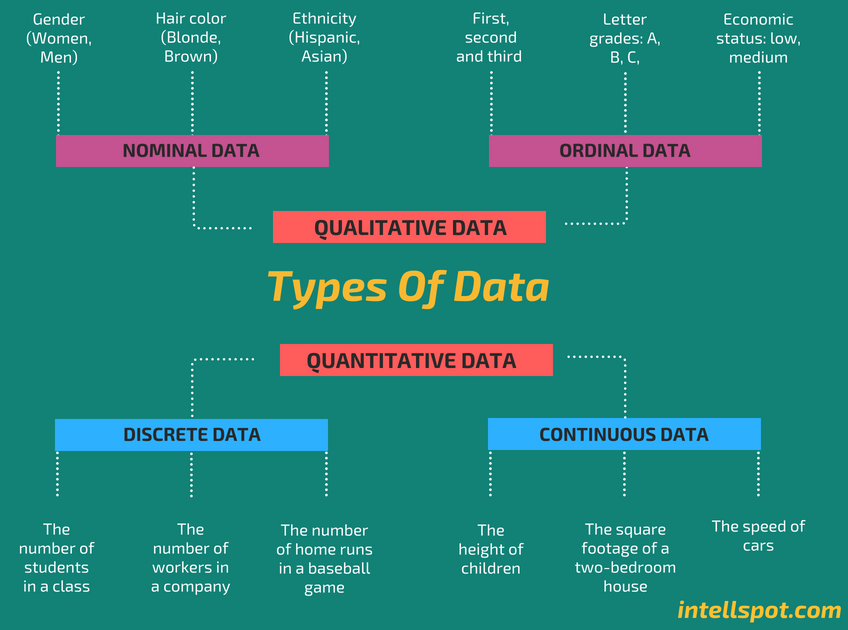

Today we are going to talk about some options for exploring relationships between `two qualitative variables`, `comparing qualitative to quantitative variables`, and `comparing two qualitative variables`. This is just a small subset, but the below graphic will help to understand some of your visualization options when exploring data.

Note that it does not have to always be a visual, sometimes just a pivot of the data is good enough!

## Choosing the right visual

### Comparing Continuous/Discrete v. Continuous/Discrete



Question: What is the relationship between `petal length` and `sepal length`?

#### Scatter Plot

In [ ]:
#-- Creating a scatter plot between the sepal width, and the petal width
plt.scatter(iris["sepal_width"], iris["petal_width"], c="#033C5A", alpha=0.5)
#-- Don't forget to label your axes!
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()

Though you can only plot `2 dimension` at one time (you only have 2 axes to work with!). You can also use color to add a `3rd dimension` to a visual. This can be highly effective. In our current example, we can color the scatter points by the species color, which gives us a much better understanding of the realtionships between `petal_width`, `sepal_width`, and `species`. When you add color you can see that there is clearly a relationship between petal with, sepal width and the species, however it is also clearly `non-linear`.

In [ ]:
#-- color mapping for different species
colors = {"versicolor":"red", "virginica":"blue", "setosa": "green"}
#-- For loop over each species
for species in iris["species"].unique():
  #-- Filter df for a given species
  plt.scatter(iris.loc[iris["species"]==species, "sepal_width"], 
              iris.loc[iris["species"]==species, "petal_width"], 
              c=colors[species], 
              alpha=0.5, 
              label=species)
#-- Dont forget a legend!
plt.legend()
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()

But can we add a `4th dimension`???

In [ ]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

#### Correlation Heatmap

We can also explore the relationship of numeric data by using a correlation matrix. Note in the above scatter plot, there appears to be a positive relationship between sepal width and petal width, yet the correlation below says it is negative? Because of the non-linear nature, correlation is a poor choice for describing the relationship, always be careful with correlation!

In [ ]:

numeric_features = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

sns.set_theme(style="white")
# Compute the correlation matrix
corr = numeric_features.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Comparing Continuous/Discrete V. Categorical/Qualitative

Perhaps we want to compare just a single numeric field to a categorical field. We can no longer use a scatter plot because this is for numeric data. One thing we can compare, is to see how the distribution of data changes accross our 3 categories (e.g. species)

Question: How does `Sepal Width` change accross `iris species`?

#### Box and Whiskers

In [ ]:
iris.groupby("species")["sepal_width"].mean()

In [ ]:
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.show()

#### Violin Plot

In [ ]:
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.show()

#### Swarm Plot

In [ ]:
sns.swarmplot(x='species', y='sepal_width', data=iris)
plt.show()

#### Multiple Histograms

Histograms can be useful, but if you have too much overlap, they can be hard to read. Below is an example of a good one, followed by a bad one!

In [ ]:
plt.hist(iris.loc[iris["species"]=="setosa", "petal_width"], alpha=0.5, label='Setosa')
plt.hist(iris.loc[iris["species"]=="versicolor", "petal_width"], alpha=0.5, label='Versicolor')
plt.hist(iris.loc[iris["species"]=="virginica", "petal_width"], alpha=0.5, label='Virginica')

plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.hist(iris.loc[iris["species"]=="setosa", "sepal_width"], alpha=0.5, label='Setosa')
plt.hist(iris.loc[iris["species"]=="versicolor", "sepal_width"], alpha=0.5, label='Versicolor')
plt.hist(iris.loc[iris["species"]=="virginica", "sepal_width"], alpha=0.5, label='Virginica')

plt.legend(loc='upper right')
plt.show()

### Comparing Categorical/Qualitative V. Categorical/Qualitative

In [ ]:
counts = iris.groupby(["petal_width_categorical", "species"])["sepal_length"].count()
counts = counts.reset_index()
counts = counts.rename(columns={"sepal_length":"count"})
counts.head()

In [ ]:
counts = counts.pivot_table(index="species", columns="petal_width_categorical", values="count")
counts = counts.fillna(0)
counts.head()

In [ ]:
fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Petal Width")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
counts = counts.div(counts.sum(axis=1), axis=0) * 100

In [ ]:
import matplotlib.ticker as mtick


In [ ]:
fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Petal Width")
plt.ylabel("Percent of Samples")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

# Further Reading

See [seaborn's documentation](https://seaborn.pydata.org/tutorial/introduction.html) (look at the menu on the left) to get ideas of how different types of data can be displayed.